<a href="https://colab.research.google.com/github/DanaKahar/Test/blob/master/1800018180.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Dana Millando Putra
NIM  : 1800018180

Menghitung Jumlah Rating Tertinggi Hotel di Jepang Berdasarkan Kategori Kebersihan dan Fasilitas

Persiapan Environment

In [1]:
! apt-get install openjdk-8-jdk-headless -qq > /dev/null
! wget -q https://downloads.apache.org/spark/spark-2.4.6/spark-2.4.6-bin-hadoop2.7.tgz
! tar xf spark-2.4.6-bin-hadoop2.7.tgz
! pip install -q findspark

In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.5-bin-hadoop2.7"

In [3]:
import findspark
findspark.init("spark-2.4.6-bin-hadoop2.7")# SPARK_HOME
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
from pyspark.sql.functions import col, avg

!pip install -q pyspark_dist_explore

import matplotlib.pyplot as plt
from pyspark_dist_explore import Histogram, hist

In [4]:
sc = spark.sparkContext
spark = SparkSession(sc)

 Load Data

In [10]:
hostel = spark.read.csv("Hostel.csv", header=True, inferSchema=True)
hostel.printSchema()            #mengecek schema dari dataset

root
 |-- ",""hostel.name"": string (nullable = true)
 |-- ""City"": string (nullable = true)
 |-- ""price.from"": string (nullable = true)
 |-- ""Distance"": string (nullable = true)
 |-- ""summary.score"": string (nullable = true)
 |-- ""rating.band"": string (nullable = true)
 |-- ""atmosphere"": string (nullable = true)
 |-- ""cleanliness"": double (nullable = true)
 |-- ""facilities"": double (nullable = true)
 |-- ""location.y"": double (nullable = true)
 |-- ""security"": double (nullable = true)
 |-- ""staff"": double (nullable = true)
 |-- ""valueformoney"": double (nullable = true)
 |-- ""lon"": double (nullable = true)
 |-- ""lat""": string (nullable = true)



Pada dataset Hostel Jepang ini terdapat 9 kolom data yaitu :

Hostel.name (Nama-nama hostel diJepang)

City (Lokasi hotel tersebut berada)

Price.from( Harga dari hotel tersebut)

Distance( Jarak hotel tersebut dari pusat kota )

Summary.Score ( Skor Peringkat dari hotel tersebut )

Rating.band ( Peringkat band(Hebat, Memuaskan dll )

Atmosphere ( Skor untuk atmosper )

Cleanliness ( Skor untuk tingkat kebersihan hotel tersebut )

Facilities ( Skor untuk fasilitas hotel tersebut )

Pada kasus hostel ini akan dilakukan analisis pada kolom Facilities dan Cleanliness

1. Proses EDA

In [23]:
print("Jumlah Hostel:")
hostel.show()

Jumlah Hostel:
+--------------------+----------------+--------------+--------------------+-----------------+---------------+--------------+---------------+--------------+--------------+------------+---------+-----------------+-----------+-----------+
|   ",""hostel.name""|        ""City""|""price.from""|        ""Distance""|""summary.score""|""rating.band""|""atmosphere""|""cleanliness""|""facilities""|""location.y""|""security""|""staff""|""valueformoney""|    ""lon""|   ""lat"""|
+--------------------+----------------+--------------+--------------------+-----------------+---------------+--------------+---------------+--------------+--------------+------------+---------+-----------------+-----------+-----------+
|"1,""""""Bike & B...|       ""Osaka""|          3300|""2.9km from city...|              9.2|     ""Superb""|           8.9|            9.4|           9.3|           8.9|         9.0|      9.4|              9.4|135.5137671| 34.682678"|
| "2,""& And Hostel""|""Fukuoka-City""|  

Lihat 8 Data Hotel Di Jepang

In [ ]:
hostel.show(8)

+--------------------+----------------+--------------+--------------------+-----------------+---------------+--------------+---------------+--------------+--------------+------------+---------+-----------------+-----------+-----------+
|   ",""hostel.name""|        ""City""|""price.from""|        ""Distance""|""summary.score""|""rating.band""|""atmosphere""|""cleanliness""|""facilities""|""location.y""|""security""|""staff""|""valueformoney""|    ""lon""|   ""lat"""|
+--------------------+----------------+--------------+--------------------+-----------------+---------------+--------------+---------------+--------------+--------------+------------+---------+-----------------+-----------+-----------+
|"1,""""""Bike & B...|       ""Osaka""|          3300|""2.9km from city...|              9.2|     ""Superb""|           8.9|            9.4|           9.3|           8.9|         9.0|      9.4|              9.4|135.5137671| 34.682678"|
| "2,""& And Hostel""|""Fukuoka-City""|          2600|""

Statistik Data

In [ ]:

hostel.describe().show()

+-------+--------------------+------------------+-----------------+--------------------+--------------------+---------------+------------------+------------------+------------------+-----------------+------------------+-----------------+------------------+-----------------+----------+
|summary|   ",""hostel.name""|          ""City""|   ""price.from""|        ""Distance""|   ""summary.score""|""rating.band""|    ""atmosphere""|   ""cleanliness""|    ""facilities""|   ""location.y""|      ""security""|        ""staff""| ""valueformoney""|          ""lon""|  ""lat"""|
+-------+--------------------+------------------+-----------------+--------------------+--------------------+---------------+------------------+------------------+------------------+-----------------+------------------+-----------------+------------------+-----------------+----------+
|  count|                 342|               342|              342|                 342|                 342|            342|               34

Pada kolom hostel.name, city, distances, dan rating band hasilnya null. Karena data tersebut bukan berisi angka namun berisi string, kenapa hasilnya null karena string tidak dapat dalam proses mean dan sttdev

Persebaran Data

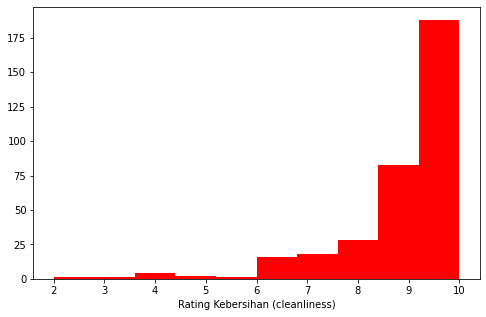

In [ ]:
hostel_cleanliness = hostel.select('""cleanliness""')

fig, axes = plt.subplots()
fig.set_size_inches(8, 5)
hist(axes, hostel_cleanliness, color="red")
plt.xlabel('Rating Kebersihan (cleanliness)')
plt.ylabel('')

plt.show()

2. PRE PROSESSING


In [22]:

# seleksi data
Hostel = hostel.select('""cleanliness""', '""facilities""')

# tampilkan 10 data teratas
hostel.show(10)

+--------------------+----------------+--------------+--------------------+-----------------+---------------+--------------+---------------+--------------+--------------+------------+---------+-----------------+-----------+-----------+
|   ",""hostel.name""|        ""City""|""price.from""|        ""Distance""|""summary.score""|""rating.band""|""atmosphere""|""cleanliness""|""facilities""|""location.y""|""security""|""staff""|""valueformoney""|    ""lon""|   ""lat"""|
+--------------------+----------------+--------------+--------------------+-----------------+---------------+--------------+---------------+--------------+--------------+------------+---------+-----------------+-----------+-----------+
|"1,""""""Bike & B...|       ""Osaka""|          3300|""2.9km from city...|              9.2|     ""Superb""|           8.9|            9.4|           9.3|           8.9|         9.0|      9.4|              9.4|135.5137671| 34.682678"|
| "2,""& And Hostel""|""Fukuoka-City""|          2600|""

3. PEMROSESAN DATA


Pada pemrosesan data ini akan dianalisis Jumlah Rating Tertinggi Hotel di Jepang Berdasarkan Kategori Kebersihan dan Fasilitas

Pada pemrosesan data Rating Tertinggi berdasarkan kategori kebersihan

In [ ]:
hostel_cleanliness.orderBy('""cleanliness""', ascending=False).show(10)

+---------------+
|""cleanliness""|
+---------------+
|           10.0|
|           10.0|
|           10.0|
|           10.0|
|           10.0|
|           10.0|
|           10.0|
|           10.0|
|           10.0|
|           10.0|
+---------------+
only showing top 10 rows



Pada pemrosesan data Rating Terendah berdasarkan kategori kebersihan

In [ ]:
hostel_cleanliness.orderBy('""cleanliness""', ascending=True).show(10)

+---------------+
|""cleanliness""|
+---------------+
|            2.0|
|            3.3|
|            4.0|
|            4.0|
|            4.0|
|            4.0|
|            5.0|
|            5.1|
|            5.8|
|            6.0|
+---------------+
only showing top 10 rows



Pada pemrosesan data Rating Tertinggi berdasarkan kategori Fasilitas

In [19]:
hostel.orderBy('""facilities""', ascending=False).show(10)

+--------------------+---------+--------------+--------------------+-----------------+---------------+--------------+---------------+--------------+--------------+------------+---------+-----------------+------------+-----------+
|   ",""hostel.name""| ""City""|""price.from""|        ""Distance""|""summary.score""|""rating.band""|""atmosphere""|""cleanliness""|""facilities""|""location.y""|""security""|""staff""|""valueformoney""|     ""lon""|   ""lat"""|
+--------------------+---------+--------------+--------------------+-----------------+---------------+--------------+---------------+--------------+--------------+------------+---------+-----------------+------------+-----------+
|"77,""Goen Lounge...|""Osaka""|          2000|""18.2km from cit...|              8.9|   ""Fabulous""|             8|           10.0|          10.0|           6.0|         8.0|     10.0|             10.0| 135.6505111| 34.815565"|
|"143,""Hostel HAR...|""Kyoto""|          1500|""1km from city c...|            

Dari analisis pemrosesan diatas didapat, rating tertinggi pada kategori fasilitas yaitu:
1. Goen Lounge memiliki rating 10
2.Hostel HAR memiliki rating 10
3.Guest House memiliki rating 10
4. dst

In [ ]:
Pada pemrosesan data Rating Terendah berdasarkan kategori Fasilitas

In [20]:
hostel.orderBy('""facilities""', ascending=True).show(10)

+--------------------+----------------+--------------+--------------------+-----------------+---------------+--------------+---------------+--------------+--------------+------------+---------+-----------------+------------+-----------+
|   ",""hostel.name""|        ""City""|""price.from""|        ""Distance""|""summary.score""|""rating.band""|""atmosphere""|""cleanliness""|""facilities""|""location.y""|""security""|""staff""|""valueformoney""|     ""lon""|   ""lat"""|
+--------------------+----------------+--------------+--------------------+-----------------+---------------+--------------+---------------+--------------+--------------+------------+---------+-----------------+------------+-----------+
|"291,""Shibamata ...|       ""Tokyo""|          3000|""18.5km from cit...|              4.9|     ""Rating""|             2|            4.0|           2.0|           2.0|        10.0|     10.0|              4.0| 139.8778804|35.7597827"|
|"235,""Nagomi-Ryo...|       ""Kyoto""|          310

Pada analisis pemrosesan data pada rating terendah kategori facilitas yaitu:
1. Shibamata memili rating 2.0
2. Nagomi-Ryo memiliki rating 2.0
3. Ezstay Osaka memiliki rating 2.0
4. bnb+Shinjuk memiliki rating 3.3
5. dst


In [ ]:
4. VISUALISASI DATA

NameError: ignored

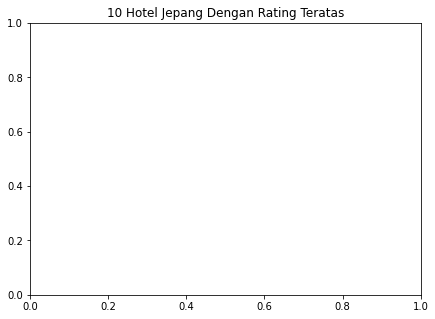

In [ ]:
# 10 Hotel Teratas
fig, axes = plt.subplots()

fig.set_size_inches(7, 5)
plt.title('10 Hotel Jepang Dengan Rating Teratas')
plt.bar('Tertinggi', hostel_tertinggi, color='red')
plt.bar('Terendah', hostel_terendah, color='yellow')
print('\n')